# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data_all.csv', index_col='e')

In [3]:
data.shape

(116322, 784)

In [4]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
e,,,,,,,,,,,,,,,,,,,,,
36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
28*28

784

#### Cada fila representa un array de 28x28

In [6]:
min(set(data.index.unique()))

0.0

In [7]:
max(set(data.index.unique()))

61.0

#### los indices se distribuyen entre 0 y 61

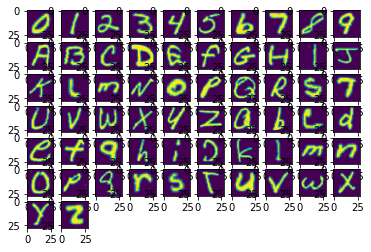

In [8]:
plt.figure(1)
for i in set(data.index.unique()):
    img= data.loc[i,'1':].iloc[0,:].values.reshape(28,28)
    plt.subplot(*[7,10,(i+1)])
    plt.imshow(img)

#### Lo anterior permite definir que:
* Los indices con numero [0-9] son números
* Los indices con número [10-35] son letras mayusculas
* Los indices con número [16-61] son letras minusculas

In [9]:
data["tipo"]=np.where(data.index<10, 'num',
                     np.where(data.index<36, 'mayus', 'minus'))

In [10]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,776,777,778,779,780,781,782,783,784,tipo
e,,,,,,,,,,,,,,,,,,,,,
36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minus
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,num
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,num
33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mayus
30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mayus


In [11]:
data.index[data["tipo"]=="num"]

Float64Index([0.0, 3.0, 5.0, 8.0, 2.0, 4.0, 2.0, 2.0, 3.0, 7.0,
              ...
              2.0, 2.0, 4.0, 8.0, 5.0, 3.0, 8.0, 7.0, 0.0, 5.0],
             dtype='float64', name='e', length=57918)

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/
* K-Nearest Neighbors
* Support Vector Machines
* Decision Tree Classifiers/Random Forests
* Naive Bayes
* Linear Discriminant Analysis
* Logistic Regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [13]:
y= data.index[data["tipo"]=="num"]
X= data[data["tipo"]=="num"].drop(columns=["tipo"])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
'''
Debido a un error con 'logistic regression' tuve que aumentar el numero de iteraciones
https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter

... no me funciono logistic.... he cambiado a gaussian naive bayes

'''
GNB_model = GaussianNB()
SVC_model = SVC()
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [14]:
GNB_model.fit(X_train, y_train)
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
GNB_prediction = GNB_model.predict(X_test)
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)

In [16]:
print("Gaussian Naive Baye - precisión: ",accuracy_score(GNB_prediction, y_test))
print("Support Vector Mach - precisión: ",accuracy_score(SVC_prediction, y_test))
print("K-Nearest Neighbors - precisión: ",accuracy_score(KNN_prediction, y_test))

Gaussian Naive Baye - precisión:  0.6499309392265193
Support Vector Mach - precisión:  0.981353591160221
K-Nearest Neighbors - precisión:  0.9707872928176795


* Try to do the same thing with lowercases.

In [17]:
y= data.index[data["tipo"]=="minus"]
X= data[data["tipo"]=="minus"].drop(columns=["tipo"])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

GNB_model = GaussianNB()
SVC_model = SVC()
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [19]:
GNB_model.fit(X_train, y_train)
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
GNB_prediction = GNB_model.predict(X_test)
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)

In [22]:
print("Gaussian Naive Baye - precisión: ",accuracy_score(GNB_prediction, y_test))
print("Support Vector Mach - precisión: ",accuracy_score(SVC_prediction, y_test))
print("K-Nearest Neighbors - precisión: ",accuracy_score(KNN_prediction, y_test))

Gaussian Naive Baye - precisión:  0.45986696230598667
Support Vector Mach - precisión:  0.9025868440502587
K-Nearest Neighbors - precisión:  0.858980044345898


* Try to do the same thing with numbers.

In [23]:
y= data.index[data["tipo"]=="mayus"]
X= data[data["tipo"]=="mayus"].drop(columns=["tipo"])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

GNB_model = GaussianNB()
SVC_model = SVC()
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [24]:
GNB_model.fit(X_train, y_train)
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
GNB_prediction = GNB_model.predict(X_test)
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)

In [26]:
print("Gaussian Naive Baye - precisión: ",accuracy_score(GNB_prediction, y_test))
print("Support Vector Mach - precisión: ",accuracy_score(SVC_prediction, y_test))
print("K-Nearest Neighbors - precisión: ",accuracy_score(KNN_prediction, y_test))

Gaussian Naive Baye - precisión:  0.5383437539874952
Support Vector Mach - precisión:  0.9290544851346179
K-Nearest Neighbors - precisión:  0.8801837437795075


### Support Vector Machine fue el modelo con mayor precisión en sus predicciones